# Protein Diversity Index Calculation
<br>
This is the python code that calculates the diversity index (DI) of the proteins based on the secondary structure prediction results.

$DI=(P(E)^2+P(H)^2+P(C)^2)^{-1}$


In [1]:
import numpy as np
import os, glob
import matplotlib
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/chennh/Project/Morphing/result/SPIDER2_uniref90/meta')
!ls *.spd3

1CEE.fasta.spd3 1ZK9.fasta.spd3 2QKE.fasta.spd3 3V0T.fasta.spd3 4W50.fasta.spd3
1DZL.fasta.spd3 2A73.fasta.spd3 2QQJ.fasta.spd3 3VO9.fasta.spd3 4WSG.fasta.spd3
1EBO.fasta.spd3 2AXZ.fasta.spd3 2UY7.fasta.spd3 3VPA.fasta.spd3 4XWS.fasta.spd3
1FZP.fasta.spd3 2BZY.fasta.spd3 2VFX.fasta.spd3 3ZWG.fasta.spd3 4Y0M.fasta.spd3
1G2C.fasta.spd3 2C1U.fasta.spd3 2WCD.fasta.spd3 3ZXG.fasta.spd3 4YDQ.fasta.spd3
1H38.fasta.spd3 2C1V.fasta.spd3 2Z9O.fasta.spd3 4A5W.fasta.spd3 4YHD.fasta.spd3
1HTM.fasta.spd3 2CE7.fasta.spd3 3EJH.fasta.spd3 4AAL.fasta.spd3 4YYP.fasta.spd3
1IYT.fasta.spd3 2FRH.fasta.spd3 3EWS.fasta.spd3 4AAN.fasta.spd3 4ZT0.fasta.spd3
1J8I.fasta.spd3 2GED.fasta.spd3 3G0H.fasta.spd3 4AE0.fasta.spd3 5AOE.fasta.spd3
1JFK.fasta.spd3 2GRM.fasta.spd3 3GMH.fasta.spd3 4B3O.fasta.spd3 5B3Z.fasta.spd3
1JTI.fasta.spd3 2H44.fasta.spd3 3HDE.fasta.spd3 4CMQ.fasta.spd3 5BMY.fasta.spd3
1K0N.fasta.spd3 2HDM.fasta.spd3 3HDF.fasta.spd3 4DXR.fasta.spd3 5C1V.fasta.spd3
1K86.fasta.spd3 2JMR.fasta.spd3 3IFA.fas

In [3]:
def getRawDI(ssmethod='SPIDER2'):
    '''
    Get the Raw diversity index from the secondary structure prediction result
    Parameter
    ---------
    ssmethod: str
        name of the secondary structure prediction method, works for 4 methods,
        namely SPIDER2, SPIDER3, Porter5, and Psipred
    
    Function will write the files naming as <pdbID>_di.txt
    '''
    if ssmethod.lower() == 'spider2':
        suffix = '.spd3'
        ss_order = 'hbc'
    elif ssmethod.lower() == 'spider3':
        suffix = '.spd33'
        ss_order = 'hbc'
    elif ssmethod.lower() == 'porter5':
        suffix = '.ss3'
        ss_order = 'hbc'
    elif ssmethod.lower() == 'psipred':
        suffix = '.ss2'
        ss_order = 'chb'
    
    path = os.getcwd()
    for file in glob.glob('*'+suffix):
        pdbname = file.split('.')[0]
        rn = []; h = []; b = []; c = []
        with open(file, 'r') as fin:
            readline = False
            for line in fin:
                line = line.strip()
                if line == '':
                    continue
                if line[0].isdigit():
                    readline = True
                if readline:
                    ls = line.split()
                    rn.append(ls[0])
                    c.append(ls[ss_order.find('c')-3])
                    h.append(ls[ss_order.find('h')-3])
                    b.append(ls[ss_order.find('b')-3])
        c = np.array(c, dtype=float); h = np.array(h, dtype=float); b = np.array(b, dtype=float)
        x = 1/(np.square(c) + np.square(h) + np.square(b))
        with open('%s_di.txt'%(pdbname), 'w') as fout:
            for ind, val in enumerate(x):
                fout.write('%d  %.4f\n'%(ind+1,val))

In [4]:
!ls *_di.txt

1CEE_di.txt 1WP8_di.txt 2LV1_di.txt 3KDS_di.txt 4DXT_di.txt 4YHD_di.txt
1DZL_di.txt 1WYY_di.txt 2MWF_di.txt 3KMZ_di.txt 4GQC_di.txt 4YYP_di.txt
1EBO_di.txt 1X0G_di.txt 2MZ7_di.txt 3KUY_di.txt 4HDD_di.txt 4ZT0_di.txt
1FZP_di.txt 1XEZ_di.txt 2N0A_di.txt 3L5N_di.txt 4HLS_di.txt 5AOE_di.txt
1G2C_di.txt 1XJT_di.txt 2N19_di.txt 3L9Q_di.txt 4J3O_di.txt 5B3Z_di.txt
1H38_di.txt 1XJU_di.txt 2N4O_di.txt 3LOW_di.txt 4JPH_di.txt 5BMY_di.txt
1HTM_di.txt 1XNT_di.txt 2N54_di.txt 3LQC_di.txt 4M4R_di.txt 5C1V_di.txt
1IYT_di.txt 1ZK9_di.txt 2NAM_di.txt 3M1B_di.txt 4N9W_di.txt 5C3I_di.txt
1J8I_di.txt 2A73_di.txt 2NAO_di.txt 3M7P_di.txt 4NC9_di.txt 5C6B_di.txt
1JFK_di.txt 2AXZ_di.txt 2NNT_di.txt 3MEE_di.txt 4O01_di.txt 5EC5_di.txt
1JTI_di.txt 2BZY_di.txt 2NXQ_di.txt 3MKO_di.txt 4O0P_di.txt 5EJB_di.txt
1K0N_di.txt 2C1U_di.txt 2OUG_di.txt 3NJQ_di.txt 4OV8_di.txt 5ET5_di.txt
1K86_di.txt 2C1V_di.txt 2P3V_di.txt 3O44_di.txt 4OW6_di.txt 5F3K_di.txt
1KCT_di.txt 2CE7_di.txt 2PBK_di.txt 3OD5_di.txt 4PHQ_di.txt 5F5R

Get the DI of the proteins based on CR and $DI_{thre}$

$max(\frac{1}{CR}\sum_{j=0}^{j<CR}DI_{i+j})_{i=1}^{L-CR+1}>=DI_{thre}$

In [5]:
def getProteinDI(CRs=np.arange(6,16,1), cutoff=5):
    '''
    Get the proteins' DI for their own raw DI.
    Parameter
    ---------
    CRs: np.array or list
        The list of the number of consecutive residues.
    cutoff: int
        The number of residues skipped in each terminals.
    
    Return
    ------
    proteinDI: np.array((# of CRs, # of proteins))
        The proteins' DI based on the corresponding CR.
    '''
    N = len(glob.glob('*_di.txt'))
    print('# of sequences in the dataset:', N)
    proteinDI = np.zeros((len(CRs), N))
    for indCR, CR in enumerate(CRs):
        for indfile, file in enumerate(glob.glob('*_di.txt')):
            di = []
            with open(file) as fin:
                for line in fin:
                    line = line.strip()
                    ls = line.split()
                    di.append(float(ls[-1]))
            di = np.array(di)
            loop = len(di) - CR - cutoff
            pdi = []
            for k in range(cutoff, loop):
                tmp = np.mean(di[k:k+CR])
                pdi.append(tmp)
            pdi = np.array(pdi)
            proteinDI[indCR, indfile] = np.max(pdi)
    return proteinDI

In [6]:
def countMeta(proteinDI, DI_thres=np.arange(1.4, 2.6, 0.05)):
    '''
    Predict the number of metamorphic proteins in the dataset based on the defined DI_thres
    Parameter
    ---------
    proteinDI: np.array((# of CRs, # of proteins))
        The proteins' DI based on the corresponding CR.
    DI_thres: np.array or list
        The list of the DI thresholds.
    '''
    meta_count = np.zeros((len(proteinDI),len(DI_thres)))
    for indDI, DIs in enumerate(proteinDI):
        for indh, hval in enumerate(DI_thres):
            count = np.sum(DIs>=hval)
            meta_count[indDI, indh] = count
            
    return meta_count
        

In [7]:
# for metamorphic dataset
os.chdir('/Users/chennh/Project/Morphing/result/SPIDER2_uniref90/meta')
getRawDI('Spider2')
Nmeta = len(glob.glob('*_di.txt'))
pDI = getProteinDI()
TP = countMeta(pDI)
FN = Nmeta - TP

# for monomorphic dataset
os.chdir('/Users/chennh/Project/Morphing/result/SPIDER2_uniref90/nonmeta')
getRawDI('Spider2')
Nmono = len(glob.glob('*_di.txt'))
pDI = getProteinDI()
FP = countMeta(pDI)
TN = Nmono - FP

# of sequences in the dataset: 196
# of sequences in the dataset: 149


In [8]:
TP

array([[196., 192., 192., 191., 191., 190., 183., 180., 176., 173., 172.,
        172., 168., 162., 149., 144., 135., 132., 129., 118., 106.,  96.,
         88.,  71.,  57.],
       [195., 191., 191., 191., 189., 184., 183., 176., 173., 172., 171.,
        165., 161., 154., 141., 136., 134., 127., 118., 111.,  95.,  85.,
         66.,  57.,  45.],
       [192., 191., 191., 190., 186., 183., 178., 175., 174., 170., 167.,
        162., 150., 143., 137., 129., 124., 118., 107.,  99.,  82.,  65.,
         55.,  45.,  38.],
       [193., 193., 191., 188., 185., 179., 175., 172., 172., 168., 164.,
        152., 145., 138., 131., 127., 116., 109.,  96.,  85.,  67.,  56.,
         45.,  34.,  27.],
       [193., 191., 191., 186., 180., 177., 174., 173., 171., 165., 161.,
        149., 142., 134., 129., 119., 113., 102.,  92.,  76.,  55.,  45.,
         36.,  27.,  20.],
       [191., 191., 187., 182., 180., 176., 173., 172., 168., 163., 154.,
        144., 137., 134., 122., 114., 104.,  91.,  

In [9]:
# calculate the Matthew Correlation Coefficient
MCC = (TP*TN-FP*FN) / np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
MCC = np.nan_to_num(MCC)
ind = np.argmax(MCC)
print(np.max(MCC))

0.391532746347834


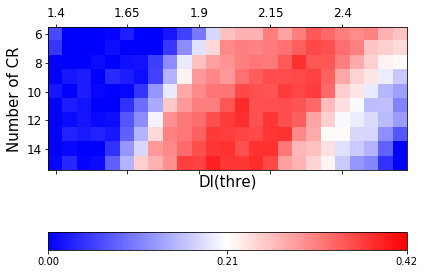

In [10]:
# plot the MCC
fig, ax = plt.subplots(1)
fig.set_size_inches(6,6)
ax.set_xticks([-6,1,7,13,19])
ax.set_xticklabels([1.2, 1.40, 1.65, 1.90, 2.15, 2.40], fontsize=12)
ax.set_yticks([-2,0,2,4,6,8])
ax.set_yticklabels([4,6,8,10,12,14], fontsize=12)
ax.set_xlabel('DI(thre)', fontsize=15)
ax.set_ylabel('Number of CR', fontsize=15)
cmat = ax.matshow(MCC, cmap=plt.cm.bwr, vmin=0, vmax=0.42)
cbar = fig.colorbar(cmat, ticks=[0, 0.21, 0.42], orientation='horizontal')
plt.tight_layout()
plt.show()